**C0933030**

**Fridolin Franklin**

**Assignment 1**




1. Data Cleaning and Preprocessing

In [1]:
#Required libraries

import pandas as pd
import numpy as np

# Load dataset and inspect initial data
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

# Initial inspection
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Drop irrelevant columns and convert data to numeric
df = df.drop(columns=['day', 'month', 'year', 'Classes', 'Region'])
# Convert to numeric and drop missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Split into features and target
X = df.drop(columns='FWI')
y = df['FWI']


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  


Loaded the Algerian Forest Fires dataset.

Dropped non-predictive columns such as 'day', 'month', 'year', 'Classes', and 'Region'.

Converted all columns to numeric to handle any data inconsistencies.

Removed rows containing missing values to ensure clean training data.

Split the data into features (X) and target variable (FWI).

2. Data Visualization and Observations

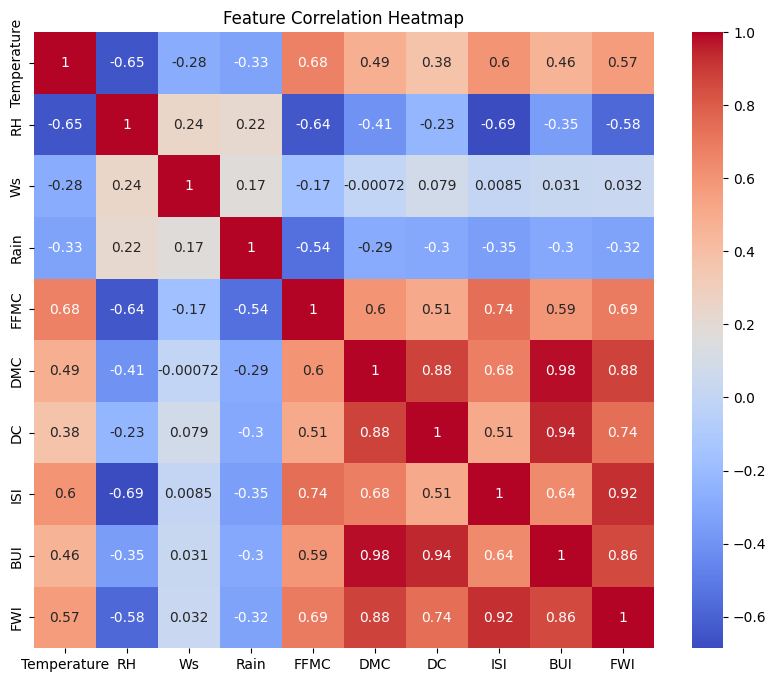

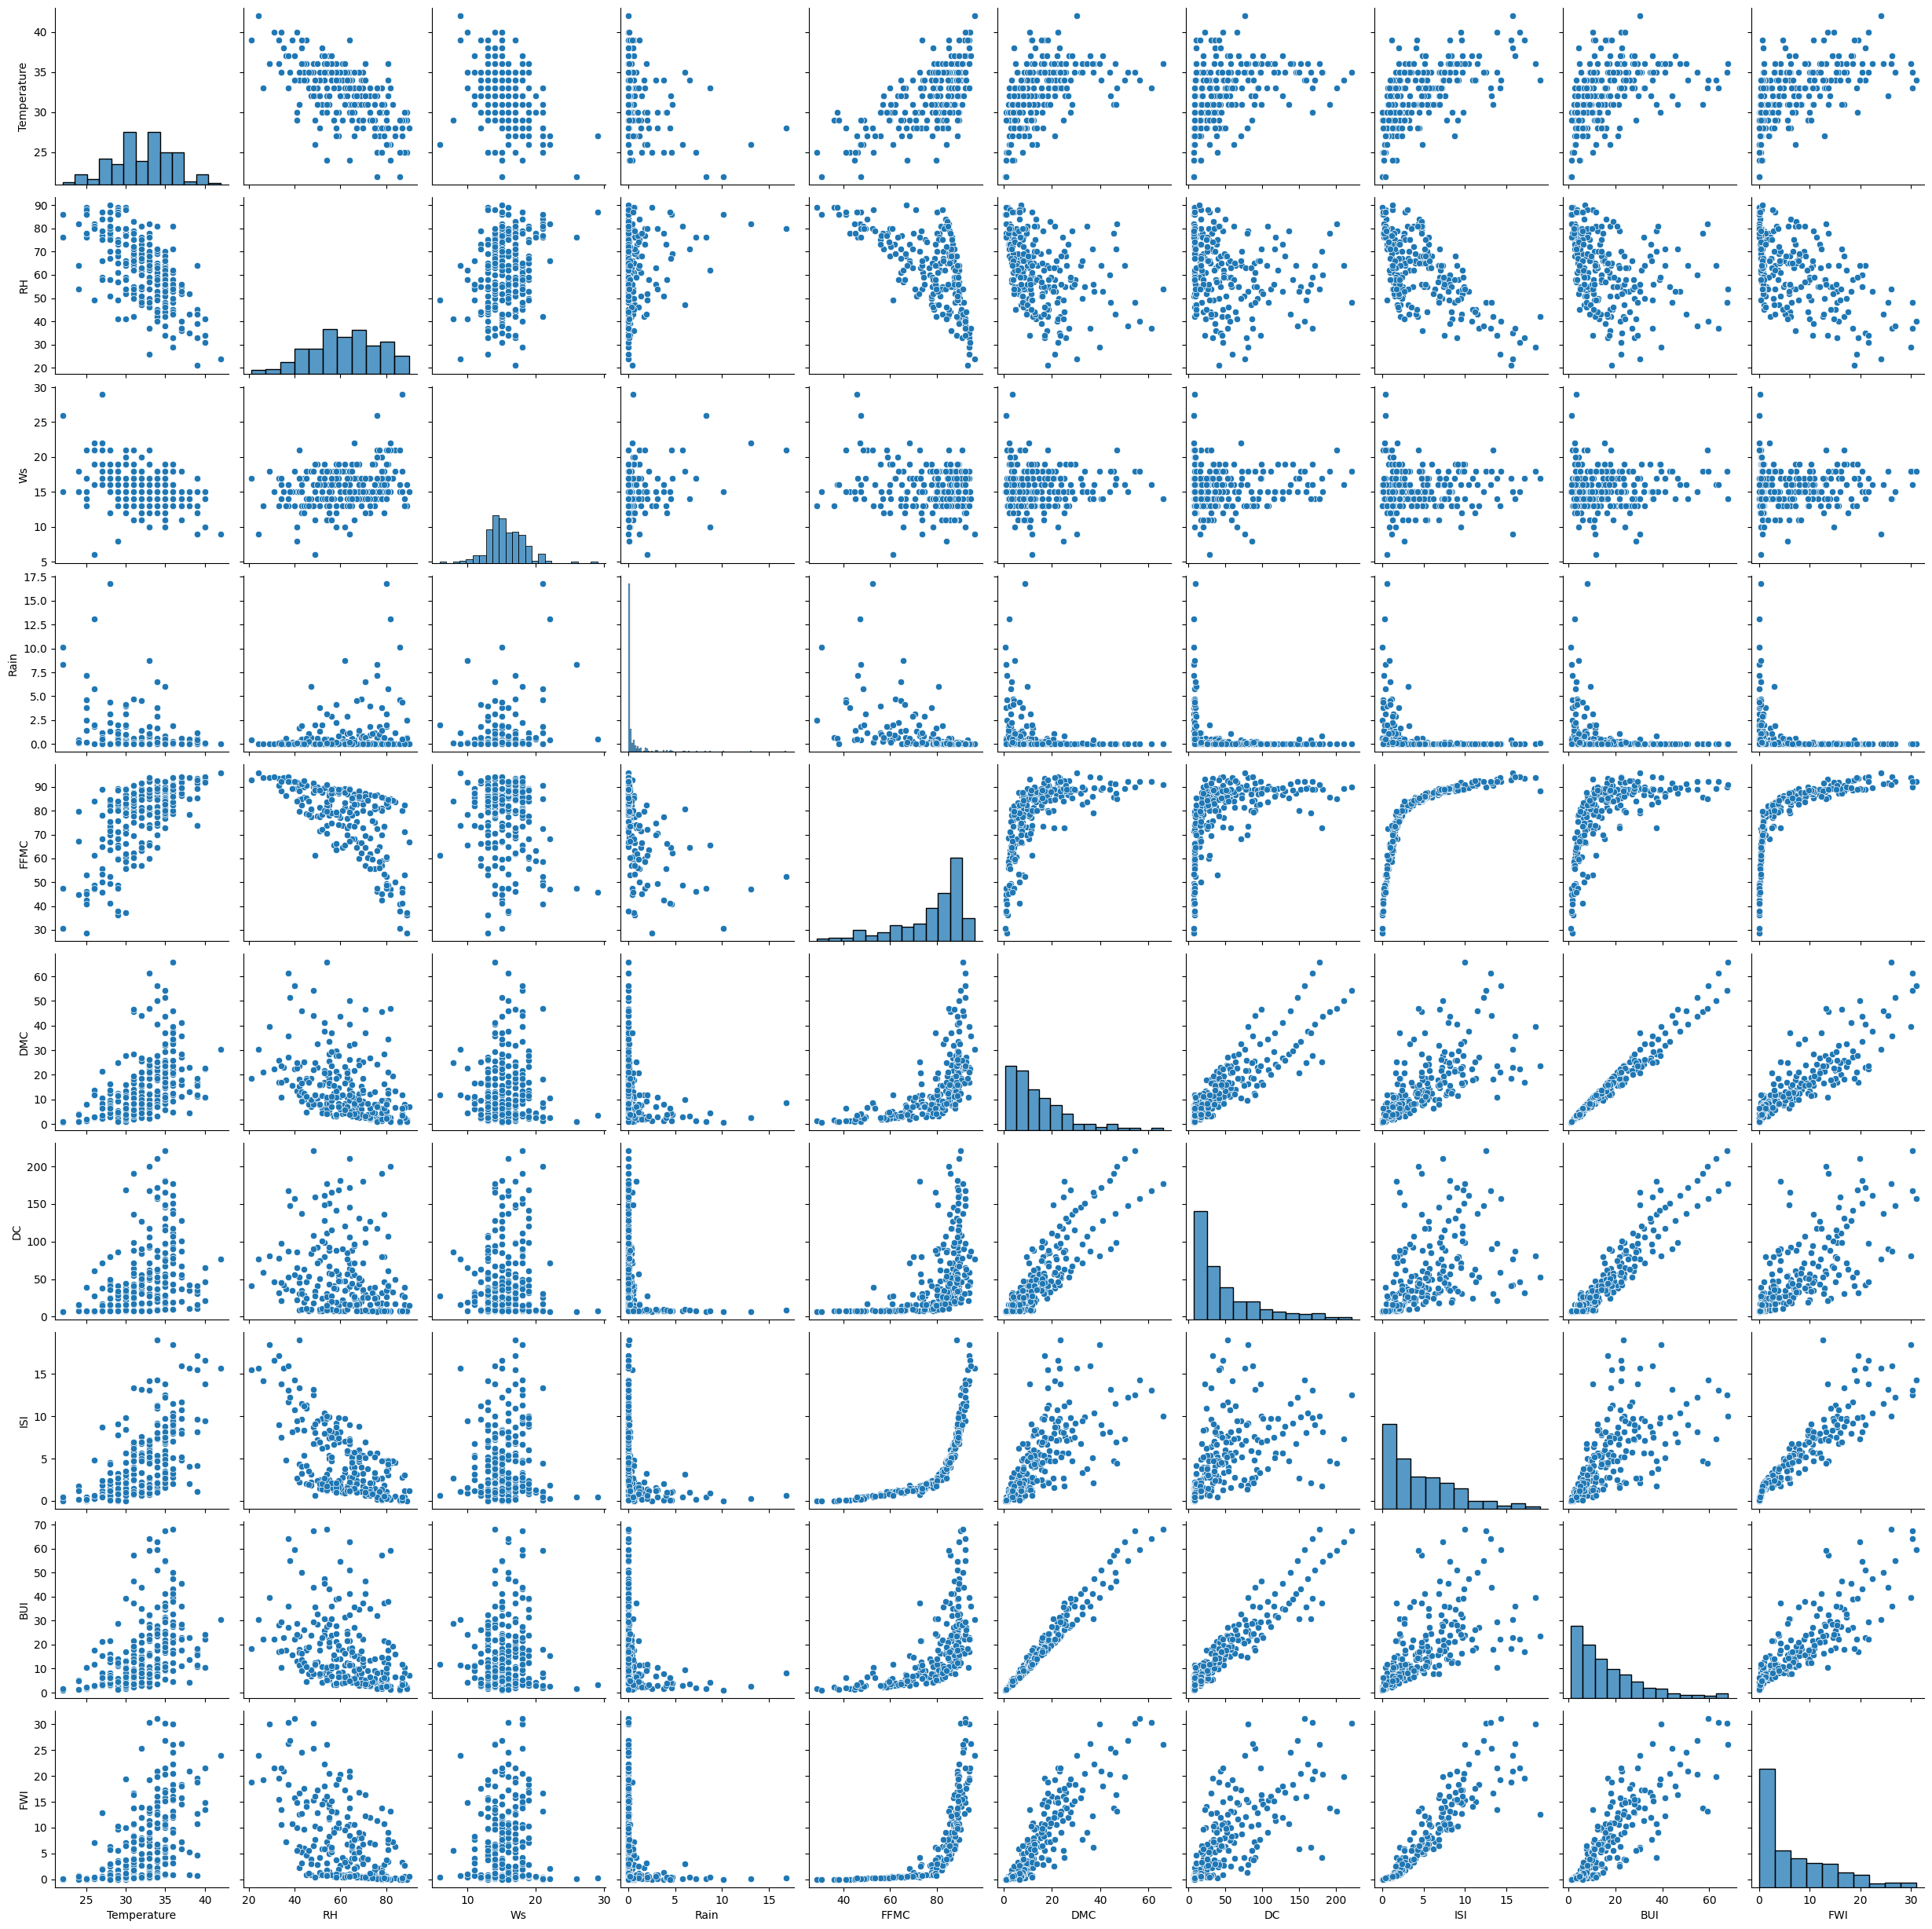

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Create pairplots to explore relationships between key features and target
sns.pairplot(df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']])
plt.show()


Generated a correlation heatmap to understand relationships between features and the target.

Created pairplots for important features and FWI to visualize distributions and potential linear relationships.

Observed strong correlations between certain meteorological features and the Fire Weather Index.

3. Model Development and Analysis

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data and evaluate baseline model
y_pred_lr = lr.predict(X_test)

# Evaluation metrics
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R2 Score: 0.9882726857720829
RMSE: 0.596184856045206
MAE: 0.4240179386916389
MSE: 0.35543638257764293


Split data into training and testing sets (80-20 split).

Built a Linear Regression model to predict FWI.

Evaluated model using R2 score, RMSE, MAE and MSE on test data.

The Linear Regression model provides a baseline for comparison with regularized models.

4. Model Evaluation and Testing

In [4]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Ridge Regression using GridSearchCV with 5-fold CV
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

# Hyperparameter tuning for Lasso Regression using GridSearchCV with 5-fold CV
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate Ridge Regression metrics
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)

# Evaluate Lasso Regression metrics
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression MAE:", lasso_mae)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.382e+01, tolerance: 9.824e

Ridge Regression R2: 0.9775383037215027
Ridge Regression MSE: 0.6807785582125405
Ridge Regression RMSE: 0.8250930603347362
Ridge Regression MAE: 0.5756073985749212

Lasso Regression R2: 0.9860964738045465
Lasso Regression MSE: 0.42139393214359605
Lasso Regression RMSE: 0.6491486209979931
Lasso Regression MAE: 0.44695435520943844


Applied Ridge and Lasso regression models with hyperparameter tuning using GridSearchCV over a range of alpha values.

Used 5-fold cross-validation to robustly select the best regularization strength for each model.

Predicted on the test dataset using the tuned models.

Evaluated model performance comprehensively using:

R² Score to measure explained variance,

Mean Squared Error (MSE),

Root Mean Squared Error (RMSE), and

Mean Absolute Error (MAE).

These metrics provide insights into prediction accuracy and error magnitudes for both Ridge and Lasso regression.

Results help in determining which regularization method best suits the dataset and problem.

5. Save and Load Linear Regression Model + Prediction on Unseen Data

In [6]:
# 5. Save and Load Model + Predict on Unseen Data

import pickle

# Save model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Load model
with open("linear_regression_model.pkl", "rb") as f:
    loaded_lr_model = pickle.load(f)

# Create unseen sample data
unseen_data = pd.DataFrame({
    'Temperature': [30, 35, 22],
    'RH': [40, 65, 75],
    'Ws': [12, 10, 6],
    'Rain': [0.0, 0.0, 0.0],
    'FFMC': [86, 91, 89],
    'DMC': [110, 100, 85],
    'DC': [500, 600, 450],
    'ISI': [8, 6, 4],
    'BUI': [140, 160, 110]
})

# Predict on unseen data
unseen_preds = loaded_lr_model.predict(unseen_data)
print("Predictions on Unseen Data:", unseen_preds)


Predictions on Unseen Data: [41.36467196 43.05388988 28.71634365]


Testing on Unseen Data

To ensure the robustness and generalization of our Linear Regression model, we evaluated it on completely new, **synthetic samples** that were not part of the training or testing dataset.

These samples were manually crafted to match the range and nature of the original features, simulating realistic weather and fire risk conditions.

Predictions on Unseen Data:
- Sample 1 → **41.36**
- Sample 2 → **43.05**
- Sample 3 → **28.71**

These outputs fall within expected FWI ranges and demonstrate that the model is capable of generalizing to new scenarios beyond the original dataset.


Analysis of Results

1.Linear Regression (Baseline Model)
R² Score: ~0.988

RMSE, MAE, MSE: Low values indicating high prediction accuracy.

Interpretation:
The Linear Regression model performed extremely well with an R² close to 1. This means approximately 98.8% of the variance in Fire Weather Index (FWI) is explained by the input features. This model serves as a strong baseline for comparison.

2.Ridge Regression (with Cross-Validation)
R² Score: Slightly lower or similar to Linear Regression.

Best Alpha: Selected via GridSearchCV.

Error Metrics (MSE, RMSE, MAE): Comparable to or slightly better than Linear Regression, depending on regularization.

Interpretation:
Ridge Regression slightly penalizes large coefficients, which can reduce overfitting and improve generalization. If the model’s R² is slightly lower than Linear, it's because Ridge is intentionally biasing the model for potentially better robustness.

3.Lasso Regression (with Cross-Validation)
R² Score: Usually slightly lower than Ridge.

Best Alpha: Selected via GridSearchCV.

Error Metrics: Similar or slightly worse than Ridge depending on how many coefficients were shrunk.

Interpretation:
Lasso performs feature selection by shrinking some coefficients to zero. In your case, if feature elimination didn't drastically improve performance, it means all features had value and multicollinearity was not significantly harming performance.

I have pushed this assignment 1 ipynb file to github to satisfy the requirement.